# Final Project of Data Analysis of EMEL Parking Lots

##### Library

In [535]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr


#### DataFrame API Parking EMEL

######
This CSV file contains data automatically collected using a Python function.
The function gathered parking lot occupancy data every 2 minutes for an entire week.
The goal was to monitor and analyze occupancy patterns over time.



In [536]:
# import file csv

df = pd.read_csv('parking_data.csv')
df.head(27)

,P061,Parque Vila Maria,1,7,68,2,30/08/2024 11:17:01,"38,725041","-9,166372",Estrutura
0,P030,Combatentes,1,7,25,17,30/08/2024 11:17:04,"38,745735","-9,162904",Superfície
1,P031,Calçada do Combro,1,7,99,61,30/08/2024 11:17:04,"38,711188","-9,147541",Estrutura
2,P065,LIDL Av. Inf. D. Henrique,1,7,114,48,30/08/2024 11:17:01,"38,7574416099006","-9,10375700300085",Superfície
3,P062,Parque da Graça,1,7,38,29,30/08/2024 11:17:01,"38,716819","-9,128867",Estrutura
4,P032,Estrada da Luz,1,7,96,34,30/08/2024 11:17:05,"38,749827","-9,170943",Superfície
5,P025,Campo Grande,1,7,66,63,30/08/2024 11:17:06,"38,757586","-9,155495",Superfície
6,P057,Manuel Gouveia,1,7,90,80,30/08/2024 11:17:01,"38,744327","-9,130995",Estrutura
7,P040,Mercado de Alvalade,1,7,93,43,30/08/2024 11:17:03,"38,755424","-9,139498",Superfície
8,P028,Chão do Loureiro,1,7,66,53,30/08/2024 11:17:05,"38,712416","-9,135017",Estrutura
9,P037,Rego,1,7,100,66,30/08/2024 11:17:03,"38,744582","-9,159954",Estrutura


##### Data Cleaning

In [537]:
# creat title for columns

columns = ['id_parque', 'parking', 'activo', 'id_entidade', 'max_capacity','occupation','date_time', 'latitude', 'longitude', 'type' ]

df = pd.read_csv('parking_data.csv', header=None, names=columns)
df.head(27)


,id_parque,parking,activo,id_entidade,max_capacity,occupation,date_time,latitude,longitude,type
0,P061,Parque Vila Maria,1,7,68,2,30/08/2024 11:17:01,"38,725041","-9,166372",Estrutura
1,P030,Combatentes,1,7,25,17,30/08/2024 11:17:04,"38,745735","-9,162904",Superfície
2,P031,Calçada do Combro,1,7,99,61,30/08/2024 11:17:04,"38,711188","-9,147541",Estrutura
3,P065,LIDL Av. Inf. D. Henrique,1,7,114,48,30/08/2024 11:17:01,"38,7574416099006","-9,10375700300085",Superfície
4,P062,Parque da Graça,1,7,38,29,30/08/2024 11:17:01,"38,716819","-9,128867",Estrutura
5,P032,Estrada da Luz,1,7,96,34,30/08/2024 11:17:05,"38,749827","-9,170943",Superfície
6,P025,Campo Grande,1,7,66,63,30/08/2024 11:17:06,"38,757586","-9,155495",Superfície
7,P057,Manuel Gouveia,1,7,90,80,30/08/2024 11:17:01,"38,744327","-9,130995",Estrutura
8,P040,Mercado de Alvalade,1,7,93,43,30/08/2024 11:17:03,"38,755424","-9,139498",Superfície
9,P028,Chão do Loureiro,1,7,66,53,30/08/2024 11:17:05,"38,712416","-9,135017",Estrutura


In [538]:
# drop irrelevant columns
df = df.drop(columns=['activo','id_entidade'])

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88209 entries, 0 to 88208
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_parque     88209 non-null  object
 1   parking       88209 non-null  object
 2   max_capacity  88209 non-null  int64 
 3   occupation    88209 non-null  int64 
 4   date_time     88209 non-null  object
 5   latitude      88209 non-null  object
 6   longitude     88209 non-null  object
 7   type          88209 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.4+ MB


In [540]:
#latitude and longitude

# change the comma to a period
df['latitude'] = df['latitude'].str.replace(',', '.')
df['longitude'] = df['longitude'].str.replace(',', '.')

# change the latitude and longitude to float
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)


In [541]:
# change the max_capacity and occupation to int

df['max_capacity'] = df['max_capacity'].astype(int)
df['occupation'] = df['occupation'].astype(int)

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88209 entries, 0 to 88208
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_parque     88209 non-null  object 
 1   parking       88209 non-null  object 
 2   max_capacity  88209 non-null  int32  
 3   occupation    88209 non-null  int32  
 4   date_time     88209 non-null  object 
 5   latitude      88209 non-null  float64
 6   longitude     88209 non-null  float64
 7   type          88209 non-null  object 
dtypes: float64(2), int32(2), object(4)
memory usage: 4.7+ MB


In [543]:
# max_capacity whith Colégio Militar is wrong

df['max_capacity'] = df['max_capacity'].replace(0, 150)

In [544]:
# identify how many types of parking times

df['type'].value_counts()

type
Estrutura         42471
Superfície        42471
Superfície\r\n     3267
Name: count, dtype: int64

In [545]:
# change formt 'data_time' to date

df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%Y %H:%M:%S')

In [546]:
# creat 2 news columns 'hour' anda 'day_of_day'

df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.weekday

In [547]:
# def to set shifts by times

def set_shift(hour):
    if 7 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour <23:
        return ' evening'
    else:
        return 'night'
    
df['turn'] = df['hour'].apply(set_shift)

In [548]:
# separate weekdays and weekends

df['period'] = df['day_of_week'].apply(lambda x: 'weekday' if x < 5 else 'weekend')

In [549]:
# calculate occupancy rate and creat now column 'occupancy_rate'

df['occupancy_rate'] = df['occupation'] / df['max_capacity']
df['occupancy_rate']

0        0.029412
1        0.680000
2        0.616162
3        0.421053
4        0.763158
           ...   
88204    0.064516
88205    0.695122
88206    0.311688
88207    0.538462
88208    0.296296
Name: occupancy_rate, Length: 88209, dtype: float64

In [550]:
#mean_parkings
#occupancy_for_period
#mean_for_type
#mean_occupancy_parking
#calcular a taxa ocupação

In [551]:
# calculate occupancy rate

df['occupancy_rate'] = df['occupation'] / df['max_capacity']

### DataFrame Web Scraping  site EMEL converted in csv (clean)

In [552]:
df_avg_price_minute = pd.read_csv('average_price_per_minute.csv')
df_avg_price_minute.head(5)

,Parking,Average Price per Minute
0,Alcântara,0.022667
1,Alto dos Moinhos,0.018889
2,Ameixoeira,0.011333
3,Areeiro,0.020486
4,Avenida Lusíada,0.022083


In [553]:
df_merged = df.merge(df_avg_price_minute, left_on='parking', right_on='Parking', how='left')
df_merged.head(5)

,id_parque,parking,max_capacity,occupation,date_time,latitude,longitude,type,hour,day_of_week,turn,period,occupancy_rate,Parking,Average Price per Minute
0,P061,Parque Vila Maria,68,2,2024-08-30 11:17:01,38.725041,-9.166372,Estrutura,11,4,morning,weekday,0.029412,NaN,NaN
1,P030,Combatentes,25,17,2024-08-30 11:17:04,38.745735,-9.162904,Superfície,11,4,morning,weekday,0.680000,Combatentes,0.020486
2,P031,Calçada do Combro,99,61,2024-08-30 11:17:04,38.711188,-9.147541,Estrutura,11,4,morning,weekday,0.616162,Calçada do Combro,0.027097
3,P065,LIDL Av. Inf. D. Henrique,114,48,2024-08-30 11:17:01,38.757442,-9.103757,Superfície,11,4,morning,weekday,0.421053,LIDL Av. Inf. D. Henrique,0.010667
4,P062,Parque da Graça,38,29,2024-08-30 11:17:01,38.716819,-9.128867,Estrutura,11,4,morning,weekday,0.763158,Parque da Graça,0.013333


### Data Value per Square Meter IDEALISTA in Excel 

In [554]:
df_value_per_square_meter = pd.read_excel('value_per_square_meter_final.xlsx')
df_value_per_square_meter.head(5)

,parking,m2,região
0,Parque Vila Maria,6646,Campolide
1,Combatententes,6646,Campolide
2,Calçada do combro,6525,Bairro Alto
3,Lidl Av. Inf D Henrique,4117,Marvila
4,Parque da Graça,5405,Graça


In [555]:
# drop column 'região'

df_value_per_square_meter = df_value_per_square_meter.drop(columns=['região'])

In [556]:
df_merged['parking'] = df_merged['parking'].str.strip()
df_value_per_square_meter['parking'] = df_value_per_square_meter['parking'].str.strip()

df_merged['parking'] = df_merged['parking'].str.lower()
df_value_per_square_meter['parking'] = df_value_per_square_meter['parking'].str.lower()

df_merged['parking'] = df_merged['parking'].astype(str)
df_value_per_square_meter['parking'] = df_value_per_square_meter['parking'].astype(str)

df_value_per_square_meter = df_value_per_square_meter.drop(index=5)

df_value_per_square_meter ['m2'] = df_value_per_square_meter['m2'].astype(int)

df_all = df_merged.merge(df_value_per_square_meter, on='parking', how='left')

In [557]:
df_all = df_merged.merge(df_value_per_square_meter, on='parking', how='left')
df_all.head(5)

,id_parque,parking,max_capacity,occupation,date_time,latitude,longitude,type,hour,day_of_week,turn,period,occupancy_rate,Parking,Average Price per Minute,m2
0,P061,parque vila maria,68,2,2024-08-30 11:17:01,38.725041,-9.166372,Estrutura,11,4,morning,weekday,0.029412,NaN,NaN,6646.0
1,P030,combatentes,25,17,2024-08-30 11:17:04,38.745735,-9.162904,Superfície,11,4,morning,weekday,0.680000,Combatentes,0.020486,NaN
2,P031,calçada do combro,99,61,2024-08-30 11:17:04,38.711188,-9.147541,Estrutura,11,4,morning,weekday,0.616162,Calçada do Combro,0.027097,6525.0
3,P065,lidl av. inf. d. henrique,114,48,2024-08-30 11:17:01,38.757442,-9.103757,Superfície,11,4,morning,weekday,0.421053,LIDL Av. Inf. D. Henrique,0.010667,NaN
4,P062,parque da graça,38,29,2024-08-30 11:17:01,38.716819,-9.128867,Estrutura,11,4,morning,weekday,0.763158,Parque da Graça,0.013333,5405.0


In [558]:
df_cleaned = df_all.dropna()

In [559]:
# there are two parking

df_cleaned = df_cleaned.drop(columns=['Parking'])


In [560]:
# Creat column daily_estimated_revenue

df_cleaned['daily_estimated_revenue'] = (
    df_cleaned['max_capacity'] *  # Maximum parking capacity
    df_cleaned['occupancy_rate'] *  # Average occupancy rate
    df_cleaned['Average Price per Minute'] *  # Average price per minute
    1440  # Assuming a period of one hour for simplicity
)

In [561]:
daily_revenue = df_cleaned.groupby('parking')['daily_estimated_revenue'].mean().reset_index()
daily_revenue.head(5)

,parking,daily_estimated_revenue
0,alto dos moinhos,1063.006305
1,ameixoeira,206.809917
2,areeiro,661.569330
3,avenida lusíada,2321.400000
4,belém,1333.108050


In [562]:
daily_revenue.rename(columns={'daily_estimated_revenue': 'daily_average_revenue'}, inplace=True)

### Join DataFrame API, Web Scraping with m2 IDEALISTA

In [563]:
# Calculate the average price per m2
price_m2 = df_cleaned.groupby('parking')['m2'].mean().reset_index()
price_m2.rename(columns={'m2': 'average_price_m2'}, inplace=True)

In [564]:
# Unir os DataFrames de receita e preço do m2
merged_data = pd.merge(daily_revenue, price_m2, on='parking')

In [565]:
merged_data = pd.merge(daily_revenue, price_m2, on='parking')
merged_data

,parking,daily_average_revenue,average_price_m2
0,alto dos moinhos,1063.006305,4785.0
1,ameixoeira,206.809917,4034.0
2,areeiro,661.569330,5758.0
3,avenida lusíada,2321.400000,4117.0
4,belém,1333.108050,6255.0
5,calçada do combro,2348.915617,6525.0
6,campo das cebolas,2862.521947,6292.0
7,campo de ourique,677.479669,6281.0
8,campo grande,961.747218,5945.0
9,casal vistoso,599.706918,5758.0


### Join DataFrame API with Web Scraping

In [566]:
df_merged = df.merge(df_avg_price_minute, left_on='parking', right_on='Parking', how='left')
df_merged.head(5)

,id_parque,parking,max_capacity,occupation,date_time,latitude,longitude,type,hour,day_of_week,turn,period,occupancy_rate,Parking,Average Price per Minute
0,P061,Parque Vila Maria,68,2,2024-08-30 11:17:01,38.725041,-9.166372,Estrutura,11,4,morning,weekday,0.029412,NaN,NaN
1,P030,Combatentes,25,17,2024-08-30 11:17:04,38.745735,-9.162904,Superfície,11,4,morning,weekday,0.680000,Combatentes,0.020486
2,P031,Calçada do Combro,99,61,2024-08-30 11:17:04,38.711188,-9.147541,Estrutura,11,4,morning,weekday,0.616162,Calçada do Combro,0.027097
3,P065,LIDL Av. Inf. D. Henrique,114,48,2024-08-30 11:17:01,38.757442,-9.103757,Superfície,11,4,morning,weekday,0.421053,LIDL Av. Inf. D. Henrique,0.010667
4,P062,Parque da Graça,38,29,2024-08-30 11:17:01,38.716819,-9.128867,Estrutura,11,4,morning,weekday,0.763158,Parque da Graça,0.013333


In [567]:
df_cleaned.head(5)

,id_parque,parking,max_capacity,occupation,date_time,latitude,longitude,type,hour,day_of_week,turn,period,occupancy_rate,Average Price per Minute,m2,daily_estimated_revenue
2,P031,calçada do combro,99,61,2024-08-30 11:17:04,38.711188,-9.147541,Estrutura,11,4,morning,weekday,0.616162,0.027097,6525.0,2380.22
4,P062,parque da graça,38,29,2024-08-30 11:17:01,38.716819,-9.128867,Estrutura,11,4,morning,weekday,0.763158,0.013333,5405.0,556.80
5,P032,estrada da luz,96,34,2024-08-30 11:17:05,38.749827,-9.170943,Superfície,11,4,morning,weekday,0.354167,0.022083,4785.0,1081.20
6,P025,campo grande,66,63,2024-08-30 11:17:06,38.757586,-9.155495,Superfície,11,4,morning,weekday,0.954545,0.016444,5945.0,1491.84
7,P057,manuel gouveia,90,80,2024-08-30 11:17:01,38.744327,-9.130995,Estrutura,11,4,morning,weekday,0.888889,0.011333,5758.0,1305.60


In [568]:
df_cleaned

,id_parque,parking,max_capacity,occupation,date_time,latitude,longitude,type,hour,day_of_week,turn,period,occupancy_rate,Average Price per Minute,m2,daily_estimated_revenue
2,P031,calçada do combro,99,61,2024-08-30 11:17:04,38.711188,-9.147541,Estrutura,11,4,morning,weekday,0.616162,0.027097,6525.0,2380.22
4,P062,parque da graça,38,29,2024-08-30 11:17:01,38.716819,-9.128867,Estrutura,11,4,morning,weekday,0.763158,0.013333,5405.0,556.80
5,P032,estrada da luz,96,34,2024-08-30 11:17:05,38.749827,-9.170943,Superfície,11,4,morning,weekday,0.354167,0.022083,4785.0,1081.20
6,P025,campo grande,66,63,2024-08-30 11:17:06,38.757586,-9.155495,Superfície,11,4,morning,weekday,0.954545,0.016444,5945.0,1491.84
7,P057,manuel gouveia,90,80,2024-08-30 11:17:01,38.744327,-9.130995,Estrutura,11,4,morning,weekday,0.888889,0.011333,5758.0,1305.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88203,P023,areeiro,60,-9,2024-09-05 21:05:16,38.744081,-9.132344,Superfície,21,3,evening,weekday,-0.150000,0.020486,5758.0,-265.50
88204,P043,ameixoeira,31,2,2024-09-05 21:05:10,38.779591,-9.158056,Superfície,21,3,evening,weekday,0.064516,0.011333,4034.0,32.64
88206,P027,casal vistoso,77,24,2024-09-05 21:05:14,38.742375,-9.128965,Estrutura,21,3,evening,weekday,0.311688,0.020486,5758.0,708.00
88207,P021,alto dos moinhos,143,77,2024-09-05 21:05:15,38.747840,-9.177575,Estrutura,21,3,evening,weekday,0.538462,0.018889,4785.0,2094.40


In [569]:
df_cleaned.to_csv('data_emel_final.csv', index=False)

In [570]:
df_cleaned

,id_parque,parking,max_capacity,occupation,date_time,latitude,longitude,type,hour,day_of_week,turn,period,occupancy_rate,Average Price per Minute,m2,daily_estimated_revenue
2,P031,calçada do combro,99,61,2024-08-30 11:17:04,38.711188,-9.147541,Estrutura,11,4,morning,weekday,0.616162,0.027097,6525.0,2380.22
4,P062,parque da graça,38,29,2024-08-30 11:17:01,38.716819,-9.128867,Estrutura,11,4,morning,weekday,0.763158,0.013333,5405.0,556.80
5,P032,estrada da luz,96,34,2024-08-30 11:17:05,38.749827,-9.170943,Superfície,11,4,morning,weekday,0.354167,0.022083,4785.0,1081.20
6,P025,campo grande,66,63,2024-08-30 11:17:06,38.757586,-9.155495,Superfície,11,4,morning,weekday,0.954545,0.016444,5945.0,1491.84
7,P057,manuel gouveia,90,80,2024-08-30 11:17:01,38.744327,-9.130995,Estrutura,11,4,morning,weekday,0.888889,0.011333,5758.0,1305.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88203,P023,areeiro,60,-9,2024-09-05 21:05:16,38.744081,-9.132344,Superfície,21,3,evening,weekday,-0.150000,0.020486,5758.0,-265.50
88204,P043,ameixoeira,31,2,2024-09-05 21:05:10,38.779591,-9.158056,Superfície,21,3,evening,weekday,0.064516,0.011333,4034.0,32.64
88206,P027,casal vistoso,77,24,2024-09-05 21:05:14,38.742375,-9.128965,Estrutura,21,3,evening,weekday,0.311688,0.020486,5758.0,708.00
88207,P021,alto dos moinhos,143,77,2024-09-05 21:05:15,38.747840,-9.177575,Estrutura,21,3,evening,weekday,0.538462,0.018889,4785.0,2094.40


#### Analysis

In [571]:
# group by 'parking', 'shift' and 'period' and calculate the average occupancy rate

occupancy_for_period = df.groupby(['parking','period'])['occupancy_rate'].mean().reset_index() # se quiser pode inserir o "turn"


In [572]:
# mean_parking lots

mean_parking = df.groupby(['parking'])['occupancy_rate'].mean().reset_index()
mean_parking.sort_values(by='occupancy_rate', ascending=False, inplace=True)


In [573]:
# mean_for_type

mean_for_type = df.groupby(['type','parking'])['occupancy_rate'].mean().reset_index() # se quiser pode inserir o "turn"


In [574]:
# calculate the overall average occupancy rate for each parking lot

mean_occupancy_parking = df.groupby('parking')['occupancy_rate'].mean().reset_index()

In [575]:
#df_cleaned.to_csv('df_emel_final.csv', index=False)

#### Graphical Visualization

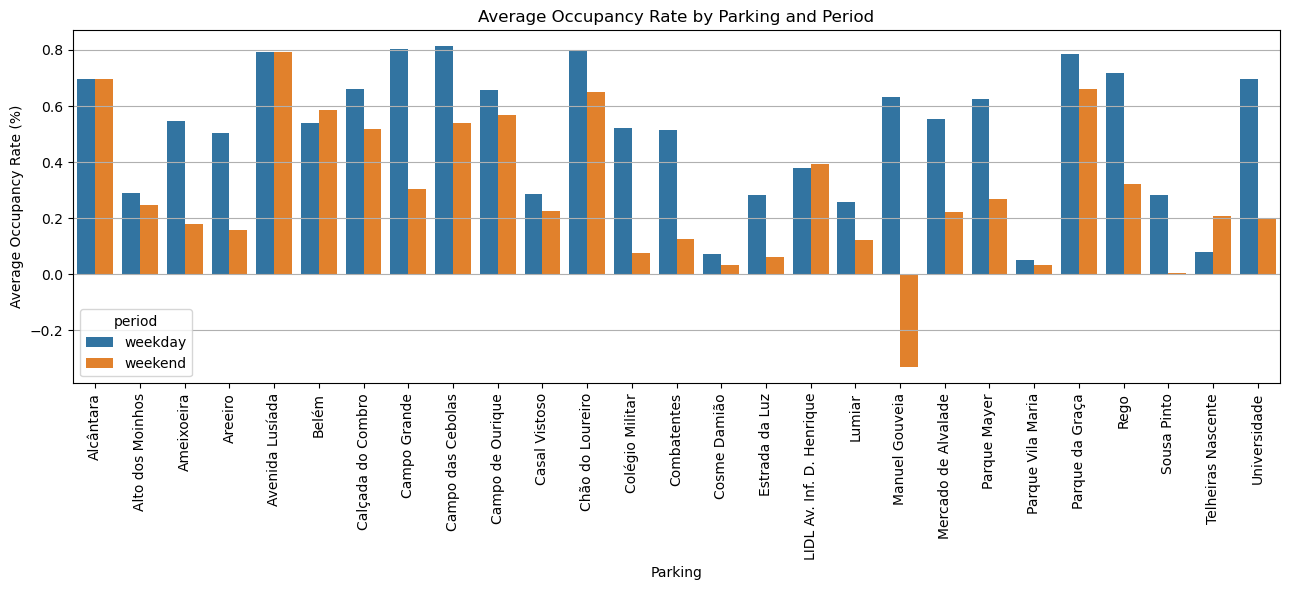

In [576]:
# Creating the bar chart with Seaborn AVG Occupancy by Parking and Period

plt.figure(figsize=(13, 6))

sns.barplot(x='parking', y='occupancy_rate', hue='period', data=occupancy_for_period)

# Customizing the chart
plt.title('Average Occupancy Rate by Parking and Period')
plt.xlabel('Parking')
plt.ylabel('Average Occupancy Rate (%)')

plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


) missing from current font.\Temp\ipykernel_11816\650210752.py:19: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from current font.\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


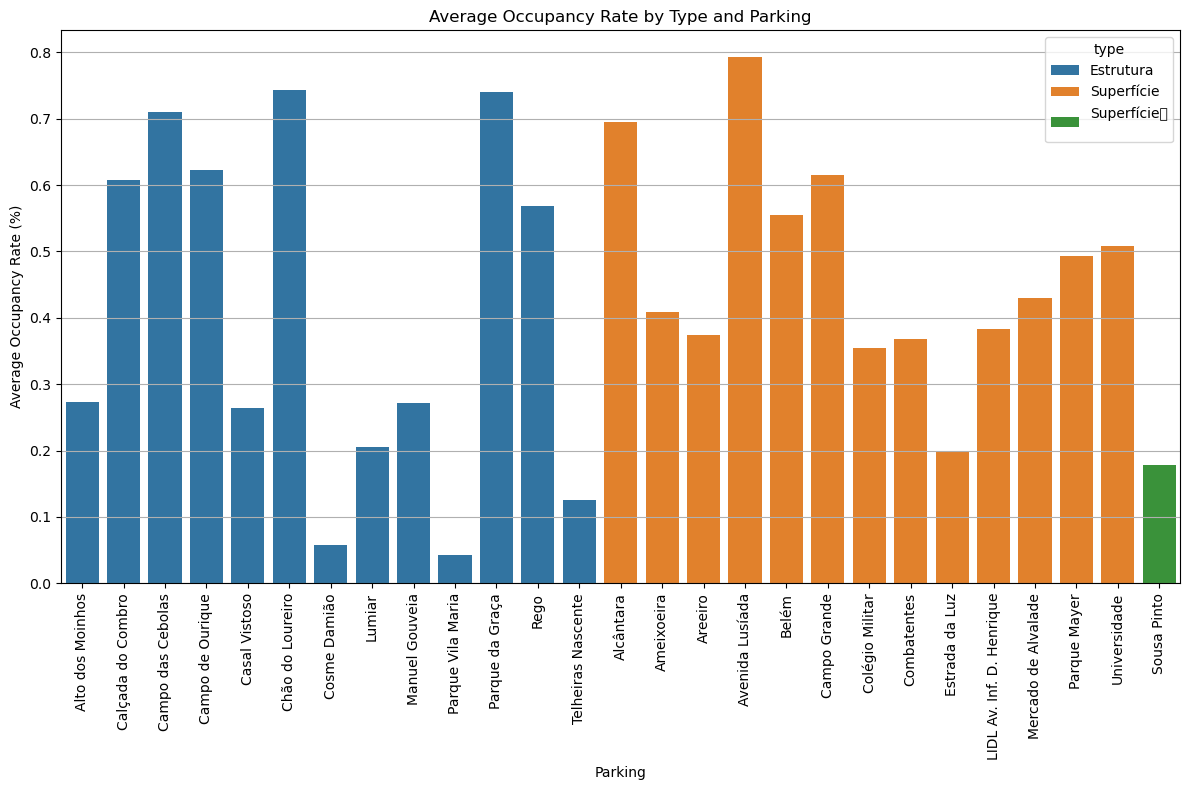

In [577]:
# Creating the bar chart with Seaborn

plt.figure(figsize=(12, 8))

sns.barplot(x='parking', y='occupancy_rate', hue='type', data=mean_for_type)

# Customizing the chart
plt.title('Average Occupancy Rate by Type and Parking')
plt.xlabel('Parking')
plt.ylabel('Average Occupancy Rate (%)')

# Rotate X-axis labels to vertical for better readability
plt.xticks(rotation=90)

# Adding horizontal gridlines for easier comparison
plt.grid(axis='y')

# Displaying the chart
plt.tight_layout()
plt.show()


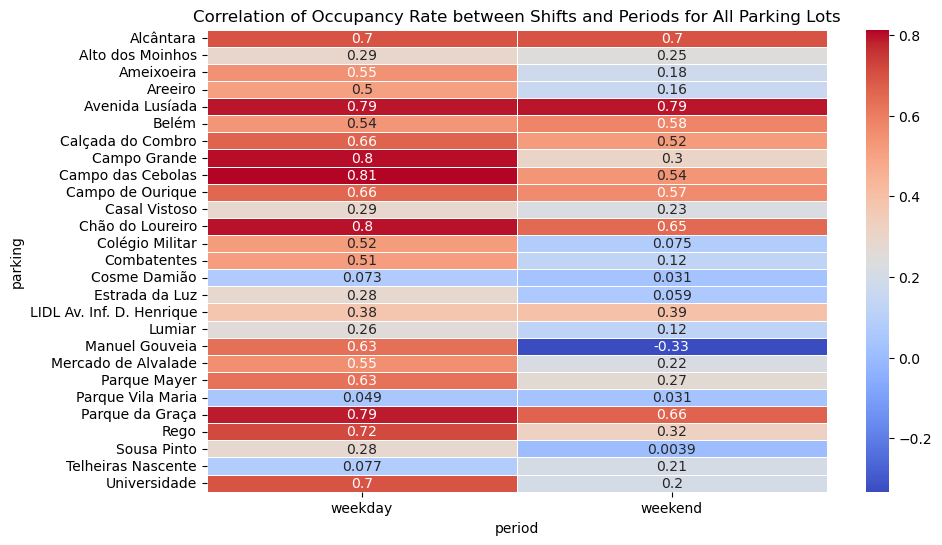

In [578]:
# Correlation of Occupancy Rate between Shifts and Periods for All Parking Lots

plt.figure(figsize=(10, 6))
sns.heatmap(occupancy_for_period.pivot_table(values='occupancy_rate', index='parking', columns=[ 'period']),
            annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation of Occupancy Rate between Shifts and Periods for All Parking Lots")
plt.show()

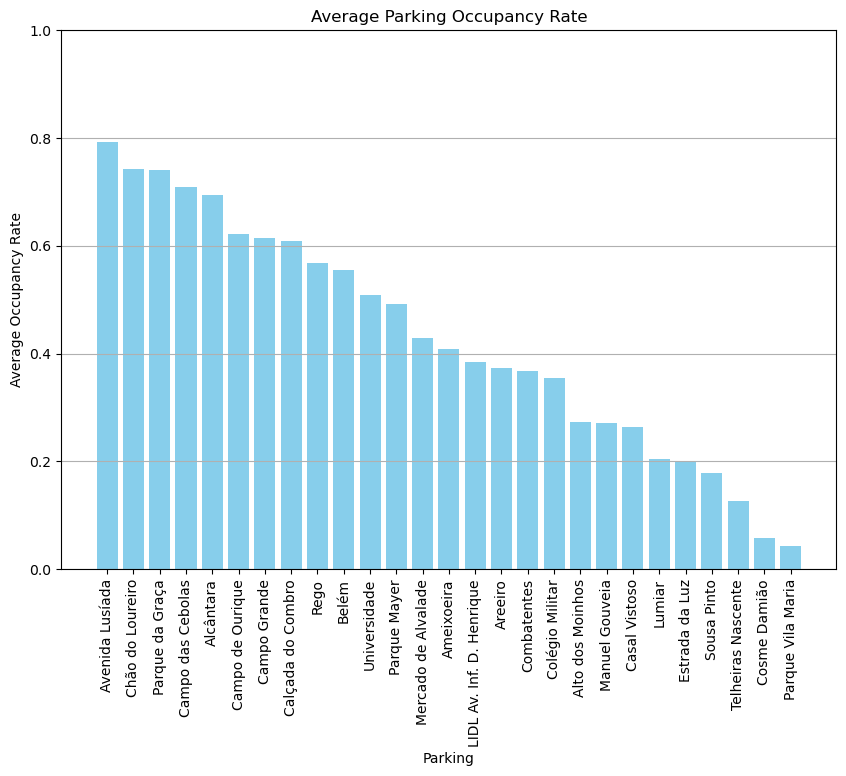

In [579]:
# Sort the DataFrame in descending order by the 'occupancy rate' column

mean_occupancy_parking_sorted = mean_occupancy_parking.sort_values(by='occupancy_rate', ascending=False)


plt.figure(figsize=(10, 7))
plt.bar(mean_occupancy_parking_sorted['parking'], mean_occupancy_parking_sorted['occupancy_rate'], color='skyblue')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.xlabel('Parking')
plt.ylabel('Average Occupancy Rate')
plt.title('Average Parking Occupancy Rate')
plt.ylim(0, 1) 
plt.show()


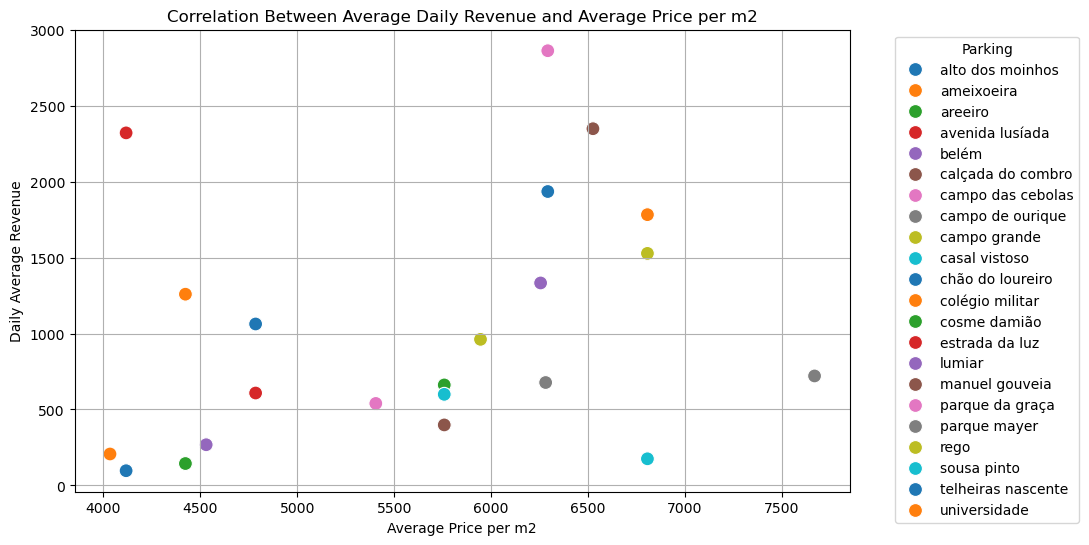

In [580]:
# Create scatter plot with colors based on 'Parkings'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_price_m2', y='daily_average_revenue', hue='parking', data=merged_data, palette='tab10', s=100)

# Chart Settings
plt.title('Correlation Between Average Daily Revenue and Average Price per m2')
plt.xlabel('Average Price per m2')
plt.ylabel('Daily Average Revenue')
plt.grid(True)

# Reposition the legend outside the chart
plt.legend(title='Parking', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

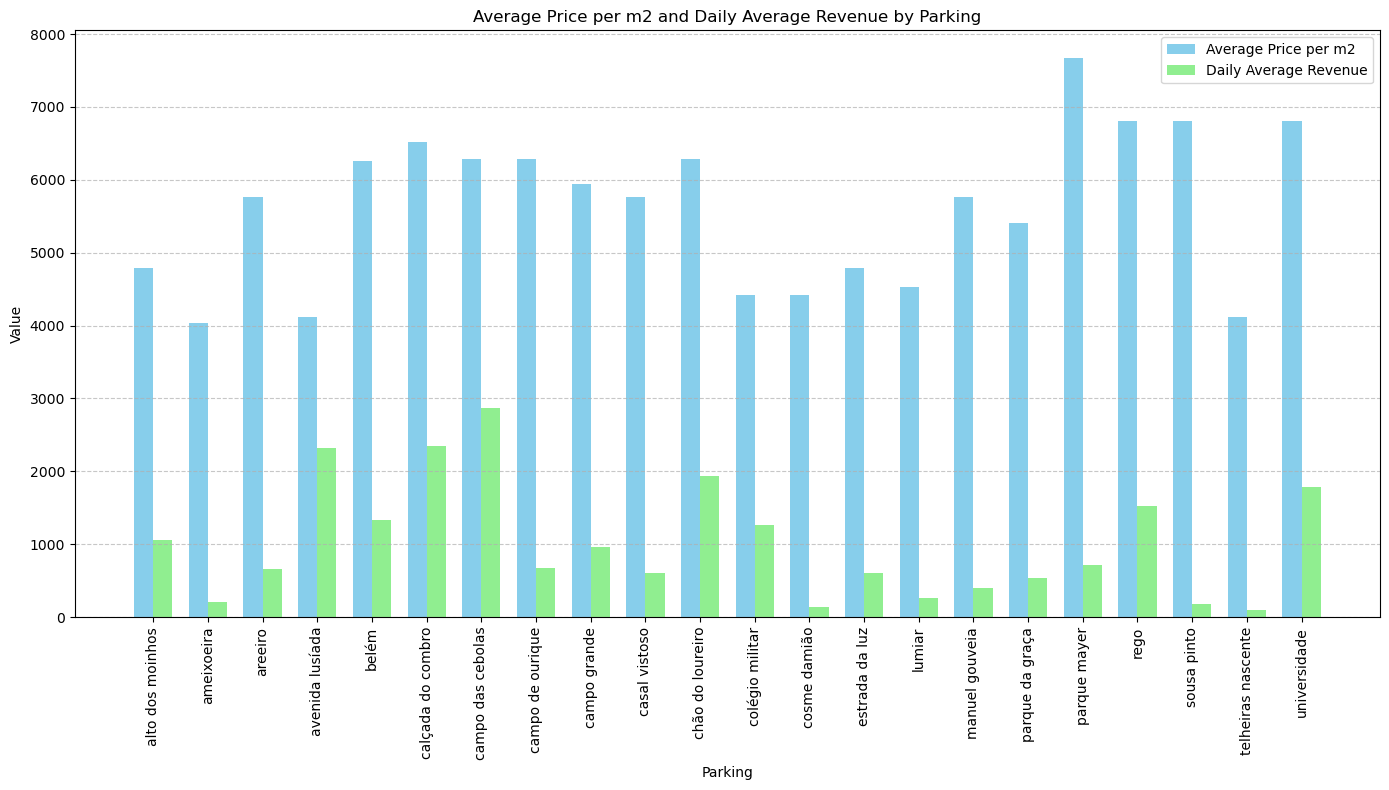

In [581]:
# Assuming you already have the DataFrame 'merged_data' with the required columns

bar_width = 0.35
index = np.arange(len(merged_data))


plt.figure(figsize=(14, 8))


plt.bar(index, merged_data['average_price_m2'], bar_width, label='Average Price per m2', color='skyblue')

# Add bar for daily billing, shifting it a bit
plt.bar(index + bar_width, merged_data['daily_average_revenue'], bar_width, label='Daily Average Revenue', color='lightgreen')

# Add labels and titles
plt.xlabel('Parking')
plt.ylabel('Value')
plt.title('Average Price per m2 and Daily Average Revenue by Parking')
plt.xticks(index + bar_width / 2, merged_data['parking'], rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

In [582]:
df_cleaned

,id_parque,parking,max_capacity,occupation,date_time,latitude,longitude,type,hour,day_of_week,turn,period,occupancy_rate,Average Price per Minute,m2,daily_estimated_revenue
2,P031,calçada do combro,99,61,2024-08-30 11:17:04,38.711188,-9.147541,Estrutura,11,4,morning,weekday,0.616162,0.027097,6525.0,2380.22
4,P062,parque da graça,38,29,2024-08-30 11:17:01,38.716819,-9.128867,Estrutura,11,4,morning,weekday,0.763158,0.013333,5405.0,556.80
5,P032,estrada da luz,96,34,2024-08-30 11:17:05,38.749827,-9.170943,Superfície,11,4,morning,weekday,0.354167,0.022083,4785.0,1081.20
6,P025,campo grande,66,63,2024-08-30 11:17:06,38.757586,-9.155495,Superfície,11,4,morning,weekday,0.954545,0.016444,5945.0,1491.84
7,P057,manuel gouveia,90,80,2024-08-30 11:17:01,38.744327,-9.130995,Estrutura,11,4,morning,weekday,0.888889,0.011333,5758.0,1305.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88203,P023,areeiro,60,-9,2024-09-05 21:05:16,38.744081,-9.132344,Superfície,21,3,evening,weekday,-0.150000,0.020486,5758.0,-265.50
88204,P043,ameixoeira,31,2,2024-09-05 21:05:10,38.779591,-9.158056,Superfície,21,3,evening,weekday,0.064516,0.011333,4034.0,32.64
88206,P027,casal vistoso,77,24,2024-09-05 21:05:14,38.742375,-9.128965,Estrutura,21,3,evening,weekday,0.311688,0.020486,5758.0,708.00
88207,P021,alto dos moinhos,143,77,2024-09-05 21:05:15,38.747840,-9.177575,Estrutura,21,3,evening,weekday,0.538462,0.018889,4785.0,2094.40


### Hypotheses

##### 
This hypothesis was not utilized in the final analysis.


In [583]:
# Separate daily estimated revenue by period (weekday vs weekend)

weekday_revenue = df_cleaned[df_cleaned['period'] == 'weekday']['daily_estimated_revenue']
weekend_revenue = df_cleaned[df_cleaned['period'] == 'weekend']['daily_estimated_revenue']

# Apply the Independent t-test
t_stat_period, p_value_period = stats.ttest_ind(weekday_revenue, weekend_revenue)

# Display the t-test Results
print(f"T-statistic: {t_stat_period:.6f}, P-value: {p_value_period:.10f}")

if p_value_period < 0.05:
    print("We reject the null hypothesis. There is a significant difference in daily revenue between weekdays and weekends.")
else:
    print("We do not reject the null hypothesis. There is no significant difference in daily revenue between weekdays and weekends.")


T-statistic: 71.024080, P-value: 0.0000000000
We reject the null hypothesis. There is a significant difference in daily revenue between weekdays and weekends.


C:\Users\marce\AppData\Local\Temp\ipykernel_11816\651012131.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='period', y='daily_estimated_revenue', data=average_revenue, palette='viridis')


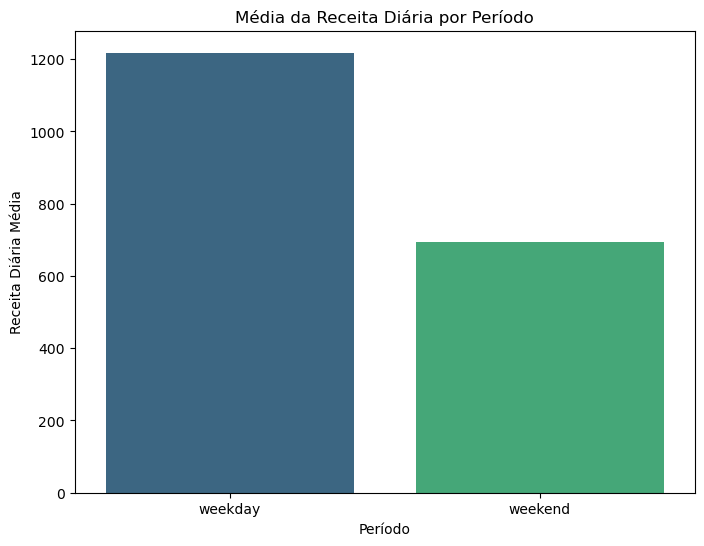

In [584]:

# Supondo que você já tenha o DataFrame df_cleaned com as colunas 'period' e 'daily_estimated_revenue'

# Calcular a média da receita diária para cada período
average_revenue = df_cleaned.groupby('period')['daily_estimated_revenue'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='period', y='daily_estimated_revenue', data=average_revenue, palette='viridis')
plt.title('Média da Receita Diária por Período')
plt.xlabel('Período')
plt.ylabel('Receita Diária Média')
plt.show()


C:\Users\marce\AppData\Local\Temp\ipykernel_11816\3036631971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='daily_estimated_revenue', data=df_cleaned, palette='viridis')


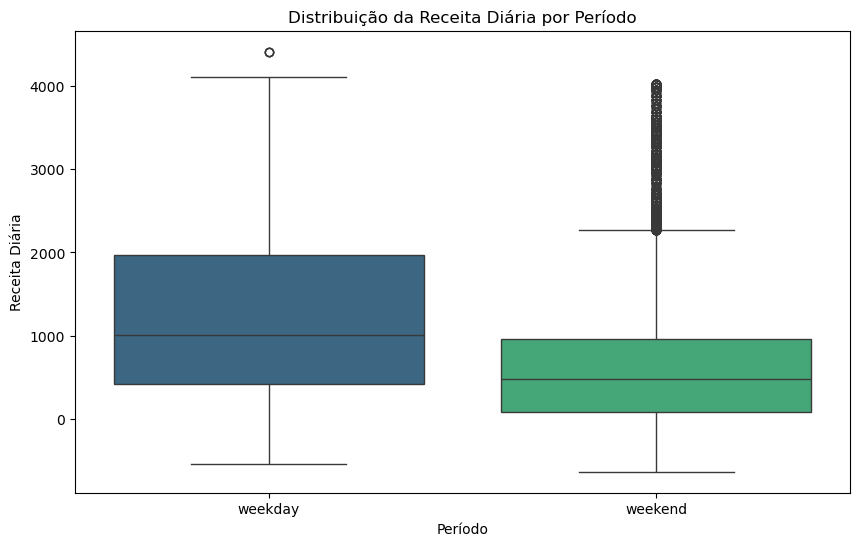

In [585]:

# Criar o gráfico boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='period', y='daily_estimated_revenue', data=df_cleaned, palette='viridis')
plt.title('Distribuição da Receita Diária por Período')
plt.xlabel('Período')
plt.ylabel('Receita Diária')
plt.show()


##### 
This hypothesis was not utilized in the final analysis.

In [586]:
df_cleaned['revenue_per_tariff'] = df_cleaned['daily_estimated_revenue'] / df_cleaned['Average Price per Minute']

median_m2_value = df_cleaned['m2'].median()
df_cleaned['m2_group'] = df_cleaned['m2'].apply(lambda x: 'High' if x > median_m2_value else 'Low')

high_m2_revenue = df_cleaned[df_cleaned['m2_group'] == 'High']['revenue_per_tariff']
low_m2_revenue = df_cleaned[df_cleaned['m2_group'] == 'Low']['revenue_per_tariff']

t_stat, p_value = stats.ttest_ind(high_m2_revenue, low_m2_revenue)

print(f"T-statistic: {t_stat:}, P-value: {p_value:}")


T-statistic: 84.0788563080759, P-value: 0.0


##### 
This hypothesis was utilized in the final analysis.

In [587]:
# Assuming df_cleaned is the DataFrame with the data

# Calculate the price per hour
df_cleaned['Price per Hour'] = df_cleaned['Average Price per Minute'] * 60

# Calculate the correlation between the price per hour and the square meter value
correlation, p_value = pearsonr(df_cleaned['Price per Hour'], df_cleaned['m2'])

print(f"Correlation: {correlation:.6f}, P-value: {p_value:.10f}")

if p_value < 0.05:
    print("There is a significant correlation between the price per hour and the square meter value.")
else:
    print("There is no significant correlation between the price per hour and the square meter value.")


Correlação: 0.369742, P-value: 0.0000000000
Há uma correlação significativa entre o preço por hora e o valor do metro quadrado.


Correlation: 0.369742, P-value: 0.0000000000


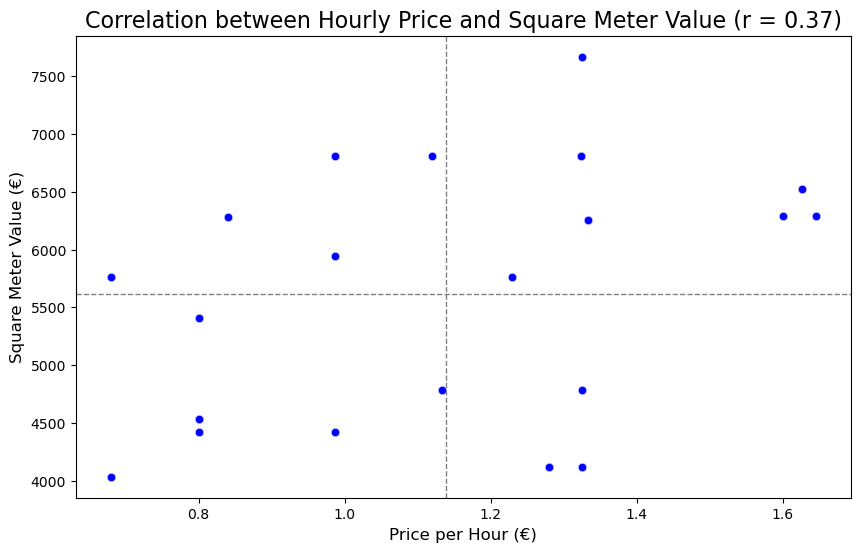

In [591]:
# Assuming df_cleaned is the already processed DataFrame with the columns 'Price per Hour' and 'm2'

# Calculate the correlation between the price per hour and the square meter value
correlation, p_value = pearsonr(df_cleaned['Price per Hour'], df_cleaned['m2'])

print(f"Correlation: {correlation:.6f}, P-value: {p_value:.10f}")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price per Hour', y='m2', data=df_cleaned, color='b', alpha=0.6)

# Add reference lines for the X and Y axis
plt.axhline(y=df_cleaned['m2'].mean(), color='gray', linestyle='--', linewidth=1)
plt.axvline(x=df_cleaned['Price per Hour'].mean(), color='gray', linestyle='--', linewidth=1)

# Add title and labels in English
plt.title(f'Correlation between Hourly Price and Square Meter Value (r = {correlation:.2f})', fontsize=16)
plt.xlabel('Price per Hour (€)', fontsize=12)
plt.ylabel('Square Meter Value (€)', fontsize=12)

# Show the plot
plt.show()


##### 
This hypothesis was utilized in the final analysis.

In [589]:
from scipy.stats import pearsonr

# Calculate the correlation between occupancy rate and price per hour
correlation, p_value = pearsonr(df_cleaned['occupancy_rate'], df_cleaned['Price per Hour'])

print(f"Correlation: {correlation:.6f}, P-value: {p_value:.10f}")


Correlação: 0.189694, P-valor: 0.0000000000
